In [104]:
%config IPComplete.greedy = True

In [105]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [106]:
# READING 
e_com=pd.read_csv('ecommerce_consumers.csv')
print(e_com.shape)
print(e_com.info())
print(e_com.head())

### CAETGORICAL CONVERSION IS REQIORED FOR LOGISTIC REGRESSION AS IT REQUIRES CONTINUOUS VARIABLE

e_com['label']=e_com['label'].astype('category')
print(e_com.head())
print(e_com.info())
e_com['label']=e_com['label'].cat.codes
print(e_com.head())
print(e_com.info())
#e_com['label']=e_com['label'].astype('float')
#print(e_com.head())
#print(e_com.info())

(200, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
ratio    200 non-null float64
time     200 non-null float64
label    200 non-null object
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None
   ratio  time   label
0   0.54  17.2  female
1   0.93  18.2    male
2   0.84  13.6  female
3   0.19   6.0    male
4   0.89  13.2  female
   ratio  time   label
0   0.54  17.2  female
1   0.93  18.2    male
2   0.84  13.6  female
3   0.19   6.0    male
4   0.89  13.2  female
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
ratio    200 non-null float64
time     200 non-null float64
label    200 non-null category
dtypes: category(1), float64(2)
memory usage: 3.5 KB
None
   ratio  time  label
0   0.54  17.2      0
1   0.93  18.2      1
2   0.84  13.6      0
3   0.19   6.0      1
4   0.89  13.2      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data col

In [107]:
## AS DATA IS NORMALIZED WE WILL JUST EXTRACT X AND Y FROM IT
X=e_com.drop(['label'],axis=1)
print(X.head())
y=e_com['label']
print(y.head())

   ratio  time
0   0.54  17.2
1   0.93  18.2
2   0.84  13.6
3   0.19   6.0
4   0.89  13.2
0    0
1    1
2    0
3    1
4    0
Name: label, dtype: int8


### Splitting datainto train and test

In [108]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=100)
print("X:train- {0}, X:test- {1} | y:train- {2}, y:test- {3}".format(type(X_train),type(X_test),type(y_train),type(y_test)))
print("X:train- {0}, X:test- {1} | y:train- {2}, y:test- {3}".format(X_train.head(),X_test.head(),y_train[0:5],y_test[0:5]))

#### TRAIN_TEST_SPLIT CAN BE DONE FROM EITHER OF PACAKAGE

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=100)
print("X:train- {0}, X:test- {1} | y:train- {2}, y:test- {3}".format(type(X_train),type(X_test),type(y_train),type(y_test)))
print("X:train- {0}, X:test- {1} | y:train- {2}, y:test- {3}".format(X_train.head(),X_test.head(),y_train[0:5],y_test[0:5]))

X:train- <class 'pandas.core.frame.DataFrame'>, X:test- <class 'pandas.core.frame.DataFrame'> | y:train- <class 'pandas.core.series.Series'>, y:test- <class 'pandas.core.series.Series'>
X:train-      ratio  time
74    0.35  14.4
3     0.19   6.0
185   0.38  20.0
26    0.02  11.2
90    0.60  13.6, X:test-      ratio  time
126   0.15   9.8
104   0.77   7.4
99    0.19  20.0
92    0.67  13.2
111   0.12   9.4 | y:train- 74     0
3      1
185    1
26     1
90     0
Name: label, dtype: int8, y:test- 126    1
104    1
99     1
92     0
111    1
Name: label, dtype: int8
X:train- <class 'pandas.core.frame.DataFrame'>, X:test- <class 'pandas.core.frame.DataFrame'> | y:train- <class 'pandas.core.series.Series'>, y:test- <class 'pandas.core.series.Series'>
X:train-      ratio  time
74    0.35  14.4
3     0.19   6.0
185   0.38  20.0
26    0.02  11.2
90    0.60  13.6, X:test-      ratio  time
126   0.15   9.8
104   0.77   7.4
99    0.19  20.0
92    0.67  13.2
111   0.12   9.4 | y:train- 74     0
3   

In [109]:
#X_test.reset_index(inplace=True)
#X_test.drop('level_0',axis=1)
X_train.head()

,ratio,time
74,0.35,14.4
3,0.19,6.0
185,0.38,20.0
26,0.02,11.2
90,0.60,13.6


### Logistic Regression Model

#### TWO ways of building same
      1: via statsmodel.api 
            1.1 GLM --> (Fit by maximum likelihood)(Generalized Linear Model)
            1.2 logit -->The user can choose from among many common optimization methods, but the default is Newton-Raphson 
                        (which, it turns out, is equivalent to iteratively reweighted least squares for logistic regression).
      2: via sklearn.linear_model LogisticRegression() ---> It penalizes and in some way regularized during model building.
      
#### http://www.kellieottoboni.com/posts/2017/07/logistic-regression-python/

In [110]:
#import statsmodels.api as sm
#lm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
#lm1.fit().summary()


#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

In [111]:
#X_test.ratio=X_test.ratio.reshape(-1,1)
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

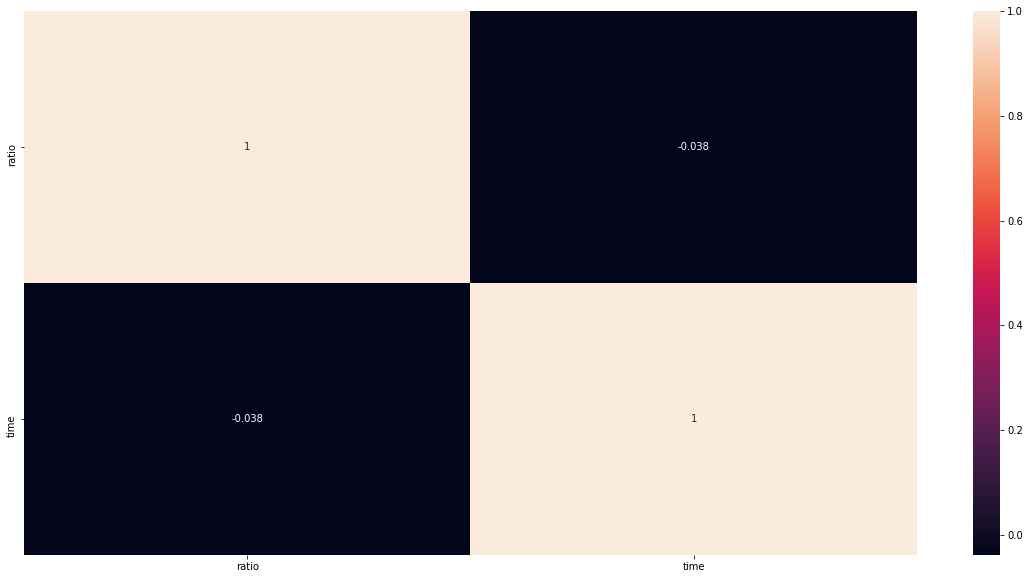

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)

In [113]:
y_pred = logsk.predict_proba(X_test)
y_pred[:,1]
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.rename({0:'ratio',1:'time'},inplace=True,axis=1)
y_pred_df['ratio_F']=y_pred_df.time.map(lambda x: 1 if x>0.5 else 0)
print(metrics.accuracy_score(y_test,y_pred_df.ratio_F))
#combined Probability
y_pred_df['combined_prob']=(y_pred_df.ratio+y_pred_df.time)
y_pred_df['combined_prob_F']=y_pred_df.combined_prob.map(lambda x: 1 if x>0.5 else 0)
print(metrics.accuracy_score(y_test,y_pred_df.combined_prob_F))
import numpy as np
print(y_pred_df.ratio[2])
print(y_pred_df.time[2])

0.7
0.7
0.3444840274986575
0.6555159725013425


In [114]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logsk.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [126]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_df.ratio_F)
print(confusion)

[[ 0 18]
 [ 0 42]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_df.ratio_F))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        18
          1       0.70      1.00      0.82        42

avg / total       0.49      0.70      0.58        60



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
import sklearn.metrics as metrics
print("Accuracy of Logistic Regression Model: ",metrics.accuracy_score(y_test,y_pred_df.ratio_F))
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the Logistic Regression Model: ",TP / float(TP+FN))
print("Specifity of the Logistic Regression Model: ",TP / float(TP+FP))
print("False Positive Ralte of the Logistic Regression Model: ",FP/ float(TN+FP))

('Accuracy of Logistic Regression Model: ', 0.7)
('Sensitivity of the Logistic Regression Model: ', nan)
('Specifity of the Logistic Regression Model: ', 0.0)
('False Positive Ralte of the Logistic Regression Model: ', 0.3)


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


In [35]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

### Building SVM Model (support vector Machine)

In [36]:
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_svc = model_linear.predict(X_test)
print("Accuracy of SVC  Model: ",metrics.accuracy_score(y_test,y_pred_svc))

('Accuracy of Logistic Regression Model: ', 0.65)


In [42]:
model_linear = SVC(kernel='rbf')
model_linear.fit(X_train, y_train)

# predict
y_pred_svc = model_linear.predict(X_test)
print("Accuracy of SVC  Model: ",metrics.accuracy_score(y_test,y_pred_svc))

('Accuracy of Logistic Regression Model: ', 0.8333333333333334)


In [43]:
model_linear = SVC(kernel='sigmoid')
model_linear.fit(X_train, y_train)

# predict
y_pred_svc = model_linear.predict(X_test)
print("Accuracy of SVC  Model: ",metrics.accuracy_score(y_test,y_pred_svc))

('Accuracy of Logistic Regression Model: ', 0.65)


In [45]:
model_linear = SVC(kernel='poly')
model_linear.fit(X_train, y_train)

# predict
y_pred_svc = model_linear.predict(X_test)
print("Accuracy of SVC  Model: ",metrics.accuracy_score(y_test,y_pred_svc))

('Accuracy of Logistic Regression Model: ', 0.65)


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
y_pred_dt=dt.predict(X_test)

In [39]:
metrics.accuracy_score(y_test,y_pred_dt)

0.9833333333333333